<a href="https://colab.research.google.com/github/bkrant/DS-Unit-2-Sprint-3-Classification-Validation/blob/master/LS_DS_234_Random_Forests_Gradient_Boosting_LIVE_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science — Classification & Validation_ 

# Random Forests & Gradient Boosting

### Setup on Google Colab

In [0]:
!pip install category_encoders

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import xgboost
xgboost.__version__

'0.82'

### Gradient Boosting and Random Forest are often the best choice for “Spreadsheet Machine Learning.”
- Meaning, [Tree Ensembles often have the best predictive accuracy](https://arxiv.org/abs/1708.05070) for supervised learning with structured, tabular data.
- Because trees can fit non-linear, non-monotonic relationships, and interactions between features.
- A single decision tree, grown to unlimited depth, will overfit. We solve this problem by ensembling trees, with bagging or boosting.
- One-hot encoding isn’t the only way, and may not be the best way, of categorical encoding for tree ensembles.



### Links

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [How a Russian mathematician constructed a decision tree - by hand - to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- [Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
- [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
- [A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)
- [How to explain gradient boosting](https://explained.ai/gradient-boosting/index.html)

#### Python libraries for Gradient Boosting
- [scikit-learn Gradient Tree Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting) — slower than other libraries, but [the next version may be better](https://twitter.com/amuellerml/status/1123613520426426368)
  - Anaconda: already installed
  - Google Colab: already installed
- [xgboost](https://xgboost.readthedocs.io/en/latest/) — can accept missing values and enforce [monotonic constraints](https://xiaoxiaowang87.github.io/monotonicity_constraint/)
  - Anaconda, Mac/Linux: `conda install -c conda-forge xgboost`
  - Windows: `pip install xgboost`
  - Google Colab: already installed
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/) — can accept missing values and enforce [monotonic constraints](https://blog.datadive.net/monotonicity-constraints-in-machine-learning/)
  - Anaconda: `conda install -c conda-forge lightgbm`
  - Google Colab: already installed
- [CatBoost](https://catboost.ai/) — can accept missing values and use [categorical features](https://catboost.ai/docs/concepts/algorithm-main-stages_cat-to-numberic.html) without preprocessing
  - Anaconda: `conda install -c conda-forge catboost`
  - Google Colab: `pip install catboost`

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- [Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)
- [Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

# Golf Putts (regression, 1 feature, non-linear)

https://statmodeling.stat.columbia.edu/2008/12/04/the_golf_puttin/

In [0]:
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

putts = pd.DataFrame(
    columns=['distance', 'tries', 'successes'], 
    data = [[2, 1443, 1346],
            [3, 694, 577],
            [4, 455, 337],
            [5, 353, 208],
            [6, 272, 149],
            [7, 256, 136],
            [8, 240, 111],
            [9, 217, 69],
            [10, 200, 67],
            [11, 237, 75],
            [12, 202, 52],
            [13, 192, 46],
            [14, 174, 54],
            [15, 167, 28],
            [16, 201, 27],
            [17, 195, 31],
            [18, 191, 33],
            [19, 147, 20],
            [20, 152, 24]]
)

putts['rate of success'] = putts['successes'] / putts['tries']
putts_X = putts[['distance']]
putts_y = putts['rate of success']

#### Docs
- [Scikit-Learn User Guide: Random Forests](https://scikit-learn.org/stable/modules/ensemble.html#random-forests) (`from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier`)
- [XGBoost Python API Reference: Scikit-Learn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) (`from xgboost import XGBRegressor, XGBClassifier`)

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

def putt_trees(max_depth=1, n_estimators=1):
    models = [DecisionTreeRegressor(max_depth=max_depth), 
              RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators), 
              XGBRegressor(max_depth=max_depth, n_estimators=n_estimators)]
    
    for model in models:
        name = model.__class__.__name__
        model.fit(putts_X, putts_y)
        ax = putts.plot('distance', 'rate of success', kind='scatter', title=name)
        ax.step(putts_X, model.predict(putts_X), where='mid')
        plt.show()
        
interact(putt_trees, max_depth=(1,6,1), n_estimators=(10,40,10));

interactive(children=(IntSlider(value=1, description='max_depth', max=6, min=1), IntSlider(value=10, descripti…

### Bagging
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

In [0]:
# Do-it-yourself Bagging Ensemble of Decision Trees (like a Random Forest)
def diy_bagging(max_depth=1, n_estimators=1):
    y_preds = []
    for i in range(n_estimators):
        title = f'Tree {i+1}'
        bootstrap_sample = putts.sample(n=len(putts), replace=True).sort_values(by='distance')
        bootstrap_X = bootstrap_sample[['distance']]
        bootstrap_y = bootstrap_sample['rate of success']
        tree = DecisionTreeRegressor(max_depth=max_depth)
        tree.fit(bootstrap_X, bootstrap_y)
        y_pred = tree.predict(bootstrap_X)
        y_preds.append(y_pred)
        ax = bootstrap_sample.plot('distance', 'rate of success', kind='scatter', title=title)
        ax.step(bootstrap_X, y_pred, where='mid')
        plt.show()
        
    ensembled = np.vstack(y_preds).mean(axis=0)
    title = f'Ensemble of {n_estimators} trees, with max_depth={max_depth}'
    ax = putts.plot('distance', 'rate of success', kind='scatter', title=title)
    ax.step(putts_X, ensembled, where='mid')
    plt.show()
    
interact(diy_bagging, max_depth=(1,6,1), n_estimators=(2,5,1));

interactive(children=(IntSlider(value=1, description='max_depth', max=6, min=1), IntSlider(value=2, descriptio…

### What's "random" about random forests?
1. Each tree trains on a random bootstrap sample of the data. (In scikit-learn, for `RandomForestRegressor` and `RandomForestClassifier`, the `bootstrap` parameter's default is `True`.) This type of ensembling is called Bagging.
2. Each split considers a random subset of the features. (In scikit-learn, when the `max_features` parameter is not `None`.) 

For extra randomness, you can try ["extremely randomized trees"](https://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees)!

>In extremely randomized trees (see [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) and [ExtraTreesRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html) classes), randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias

### Boosting 

Boosting (used by Gradient Boosting) is different than Bagging (used by Random Forests). 

[_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8.2.3, Boosting:

>Recall that bagging involves creating multiple copies of the original training data set using the bootstrap, fitting a separate decision tree to each copy, and then combining all of the trees in order to create a single predictive model.

>**Boosting works in a similar way, except that the trees are grown _sequentially_: each tree is grown using information from previously grown trees.**

>Unlike fitting a single large decision tree to the data, which amounts to _fitting the data hard_ and potentially overfitting, the boosting approach instead _learns slowly._ Given the current model, we fit a decision tree to the residuals from the model.

>We then add this new decision tree into the fitted function in order to update the residuals. Each of these trees can be rather small, with just a few terminal nodes. **By fitting small trees to the residuals, we slowly improve fˆ in areas where it does not perform well.**

>Note that in boosting, unlike in bagging, the construction of each tree depends strongly on the trees that have already been grown.

# Wave (regression, 1 feature, non-monotonic, train/test split)

http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [0]:
from sklearn.model_selection import train_test_split

def make_data():
    import numpy as np
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 2 * (0.5 - rng.rand(16))
    return X, y

wave_X, wave_y = make_data()
wave_X_train, wave_X_test, wave_y_train, wave_y_test = train_test_split(
    wave_X, wave_y, test_size=0.25, random_state=42)

In [18]:
wave_y[:3], wave_y.shape

(array([-0.76604031,  0.09131401,  0.09668352]), (80,))

In [16]:
wave_X[:3].T, wave_X.shape

(array([[0.00057187, 0.09144139, 0.09683479]]), (80, 1))

In [6]:
def wave_trees(max_depth=1, n_estimators=10):
    models = [DecisionTreeRegressor(max_depth=max_depth), 
              RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators), 
              XGBRegressor(max_depth=max_depth, n_estimators=n_estimators)]
    
    for model in models:
        name = model.__class__.__name__
        model.fit(wave_X_train, wave_y_train)
        print(f'{name} Train R^2 score:', model.score(wave_X_train, wave_y_train))
        print(f'{name} Test R^2 score:', model.score(wave_X_test, wave_y_test))
        plt.scatter(wave_X_train, wave_y_train)
        plt.scatter(wave_X_test, wave_y_test)
        plt.step(wave_X, model.predict(wave_X), where='mid')
        plt.show()
        
interact(wave_trees, max_depth=(1,8,1), n_estimators=(10,40,10));

interactive(children=(IntSlider(value=1, description='max_depth', max=8, min=1), IntSlider(value=10, descripti…

# Titanic (classification, 2 features, interactions, non-linear / non-monotonic)

#### viz2D helper function

In [0]:
def viz2D(fitted_model, X, feature1, feature2, num=100, title=''):
    """
    Visualize model predictions as a 2D heatmap
    For regression or binary classification models, fitted on 2 features
    
    Parameters
    ----------
    fitted_model : scikit-learn model, already fitted
    X : pandas dataframe, which was used to fit model
    feature1 : string, name of feature 1
    feature2 : string, name of feature 2
    target : string, name of target
    num : int, number of grid points for each feature
    
    Returns
    -------
    predictions: numpy array, predictions/predicted probabilities at each grid point
    
    References
    ----------
    https://scikit-learn.org/stable/auto_examples/classification/plot_classification_probability.html
    https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
    """
    x1 = np.linspace(X[feature1].min(), X[feature1].max(), num)
    x2 = np.linspace(X[feature2].min(), X[feature2].max(), num)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:,1]
    else:
        predicted = fitted_model.predict(X)
    
    plt.imshow(predicted.reshape(num, num), cmap='viridis')
    plt.title(title)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()
    return predicted

### Read data, encode categorical feature, impute missing values

In [21]:
!pip install category_encoders

     |████████████████████████████████| 92kB 5.1MB/s 


In [22]:
import category_encoders as ce
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

titanic = sns.load_dataset('titanic')
features = ['age', 'sex']
target = 'survived'

preprocessor = make_pipeline(ce.OrdinalEncoder(), SimpleImputer())
X = preprocessor.fit_transform(titanic[features])
X = pd.DataFrame(X, columns=features)
y = titanic[target]

X.head()

,age,sex
0,22.0,1.0
1,38.0,2.0
2,26.0,2.0
3,35.0,2.0
4,35.0,1.0


### Logistic Regression

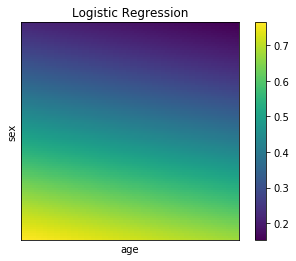

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(X, y)
viz2D(lr, X, feature1='age', feature2='sex', title='Logistic Regression');

### Decision Tree, Random Forest, Gradient Boosting

#### Docs
- [Scikit-Learn User Guide: Random Forests](https://scikit-learn.org/stable/modules/ensemble.html#random-forests) (`from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier`)
- [XGBoost Python API Reference: Scikit-Learn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) (`from xgboost import XGBRegressor, XGBClassifier`)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

def titanic_trees(max_depth=1, n_estimators=1):
    models = [DecisionTreeClassifier(max_depth=max_depth), 
              RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators), 
              XGBClassifier(max_depth=max_depth, n_estimators=n_estimators)]
    
    for model in models:
        name = model.__class__.__name__
        model.fit(X.values, y.values)
        viz2D(model, X, feature1='age', feature2='sex', title=name)
        
interact(titanic_trees, max_depth=(1,6,1), n_estimators=(10,40,10));

interactive(children=(IntSlider(value=1, description='max_depth', max=6, min=1), IntSlider(value=10, descripti…

### Bagging

In [25]:
# Do-it-yourself Bagging Ensemble of Decision Trees (like a Random Forest)

def titanic_bagging(max_depth=1, n_estimators=1):
    predicteds = []
    for i in range(n_estimators):
        title = f'Tree {i+1}'
        bootstrap_sample = titanic.sample(n=len(titanic), replace=True)
        preprocessor = make_pipeline(ce.OrdinalEncoder(), SimpleImputer())
        bootstrap_X = preprocessor.fit_transform(bootstrap_sample[['age', 'sex']])
        bootstrap_y = bootstrap_sample['survived']
        tree = DecisionTreeClassifier(max_depth=max_depth)
        tree.fit(bootstrap_X, bootstrap_y)
        predicted = viz2D(tree, X, feature1='age', feature2='sex', title=title)
        predicteds.append(predicted)
    
    ensembled = np.vstack(predicteds).mean(axis=0)
    title = f'Ensemble of {n_estimators} trees, with max_depth={max_depth}'
    plt.imshow(ensembled.reshape(100, 100), cmap='viridis')
    plt.title(title)
    plt.xlabel('age')
    plt.ylabel('sex')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()
        
interact(titanic_bagging, max_depth=(1,6,1), n_estimators=(2,5,1));

interactive(children=(IntSlider(value=1, description='max_depth', max=6, min=1), IntSlider(value=2, descriptio…

### Select more features, compare models

In [28]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
titanic.deck.isnull().sum()

0

In [35]:
titanic.deck.dtype

dtype('O')

In [34]:
from sklearn.preprocessing import MinMaxScaler

titanic['deck'] = titanic['deck'].astype(str)
features = ['age', 'sex', 'pclass', 'sibsp', 'parch', 'fare', 'deck', 'embark_town']
target = 'survived'

preprocessor = make_pipeline(ce.OrdinalEncoder(), SimpleImputer(), MinMaxScaler())
titanic_X = preprocessor.fit_transform(titanic[features])
titanic_X = pd.DataFrame(titanic_X, columns=features)
titanic_y = titanic[target]

titanic_X.head()

,age,sex,pclass,sibsp,parch,fare,deck,embark_town
0,0.271174,0.0,1.0,0.125,0.0,0.014151,0.000000,0.000000
1,0.472229,1.0,0.0,0.125,0.0,0.139136,0.142857,0.333333
2,0.321438,1.0,1.0,0.000,0.0,0.015469,0.000000,0.000000
3,0.434531,1.0,0.0,0.125,0.0,0.103644,0.142857,0.000000
4,0.434531,0.0,1.0,0.000,0.0,0.015713,0.000000,0.000000


In [0]:
from sklearn.model_selection import cross_val_score

models = [LogisticRegression(solver='lbfgs', max_iter=1000), 
          DecisionTreeClassifier(max_depth=3), 
          DecisionTreeClassifier(max_depth=None), 
          RandomForestClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42), 
          RandomForestClassifier(max_depth=None, n_estimators=100, n_jobs=-1, random_state=42), 
          XGBClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42)]

for model in models:
    print(model, '\n')
    score = cross_val_score(model, titanic_X, titanic_y, scoring='accuracy', cv=5).mean()
    print('Cross-Validation Accuracy:', score, '\n', '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 

Cross-Validation Accuracy: 0.7911905757420685 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Cross-Validation Accuracy: 0.8047054617955187 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0

### Feature importances

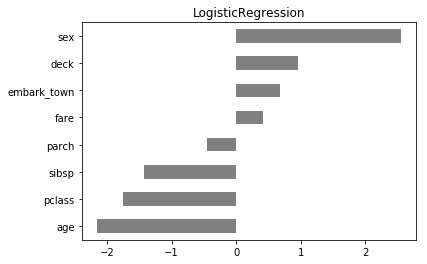

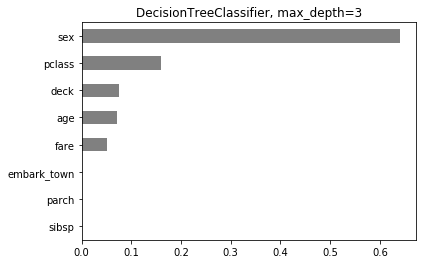

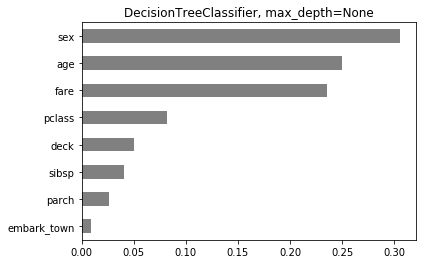

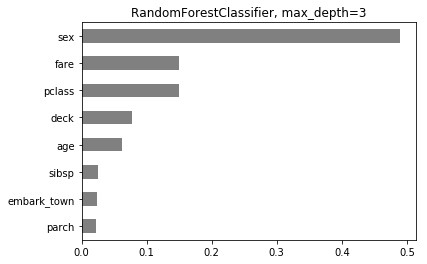

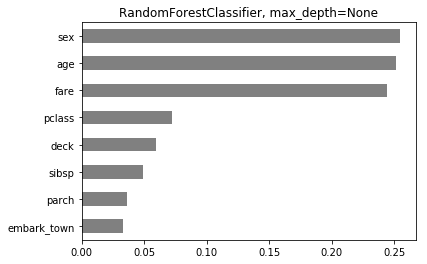

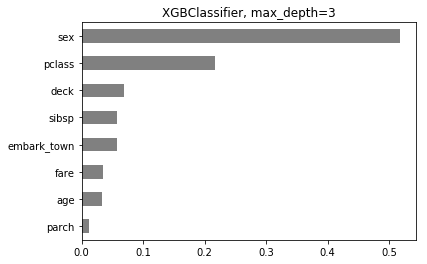

In [0]:
for model in models:
    name = model.__class__.__name__
    model.fit(titanic_X, titanic_y)
    if name == 'LogisticRegression':
        coefficients = pd.Series(model.coef_[0], titanic_X.columns)
        coefficients.sort_values().plot.barh(color='grey', title=name)
        plt.show()
    else:
        importances = pd.Series(model.feature_importances_, titanic_X.columns)
        title = f'{name}, max_depth={model.max_depth}'
        importances.sort_values().plot.barh(color='grey', title=title)
        plt.show()

# ASSIGNMENT

**Train Random Forest and Gradient Boosting models**, on the Bank Marketing dataset. (Or another dataset of your choice, not used during this lesson.) You may use any Python libraries for Gradient Boosting.

Then, you have many options!

#### Keep improving your model
- **Try new categorical encodings.**
- Explore and visualize your data. 
- Wrangle [bad data](https://github.com/Quartz/bad-data-guide), outliers, and missing values.
- Try engineering more features. You can transform, bin, and combine features. 
- Try selecting fewer features.

#### Follow the links — learn by reading & doing
- Links at the top of this notebook
- Links in previous notebooks
- Extra notebook for today, about **"monotonic constraints"** and "early stopping" with xgboost

In [71]:
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
df = df.set_index('name')
print(df.shape)
df.sample(2)

(195, 23)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,,,
phon_R01_S16_1,108.807,134.656,102.874,0.00761,0.00007,0.00349,0.00486,0.01046,0.02719,0.255,0.01483,0.01609,0.02067,0.04450,0.01036,21.028,1,0.536009,0.819032,-4.649573,0.205558,1.986899,0.316700
phon_R01_S13_5,128.001,138.052,122.080,0.00436,0.00003,0.00137,0.00166,0.00411,0.02297,0.210,0.01323,0.01072,0.01677,0.03969,0.00481,24.692,0,0.459766,0.766204,-7.072419,0.220434,1.972297,0.119308


In [72]:
df.index.is_unique

True

In [73]:
df.status.value_counts(normalize=True) # 1 = Parkinson's   0 = healthy

1    0.753846
0    0.246154
Name: status, dtype: float64

In [0]:
X = df.drop(columns=['status'])
y = df['status']

In [75]:
from sklearn.preprocessing import MinMaxScaler

features = X.columns.tolist()
target = 'status'

scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])
X = pd.DataFrame(X, columns=features)
y = df[target]

X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,0.332627,0.347354,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,0.515986,0.535685,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,0.443374,0.446133,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,0.475539,0.466079,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,0.584553,0.577341,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611


In [76]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = sm.add_constant(X)
vif = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
pd.Series(vif, X_vif.columns).sort_values(ascending=False)

Shimmer:APQ3        1.508607e+07
Shimmer:DDA         1.507798e+07
Jitter:DDP          1.395141e+06
MDVP:RAP            1.394371e+06
MDVP:Shimmer        7.597653e+02
const               2.662466e+02
MDVP:Jitter(%)      1.919769e+02
MDVP:PPQ            1.080988e+02
Shimmer:APQ5        1.064236e+02
MDVP:Shimmer(dB)    9.930468e+01
MDVP:APQ            6.192872e+01
MDVP:Jitter(Abs)    4.716608e+01
PPE                 2.825397e+01
spread1             2.070846e+01
NHR                 1.165025e+01
HNR                 7.325529e+00
MDVP:Fo(Hz)         7.101626e+00
RPDE                3.794495e+00
D2                  3.481727e+00
DFA                 3.043194e+00
spread2             2.889591e+00
MDVP:Flo(Hz)        2.216546e+00
MDVP:Fhi(Hz)        1.568587e+00
dtype: float64

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 

Cross-Validation Accuracy: 0.8292397660818713 
 



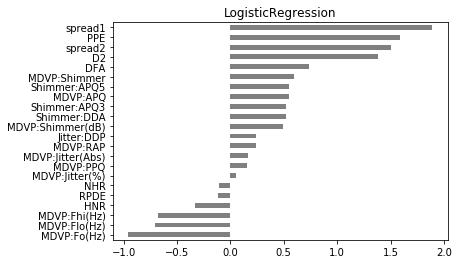

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Cross-Validation Accuracy: 0.8084502923976608 
 



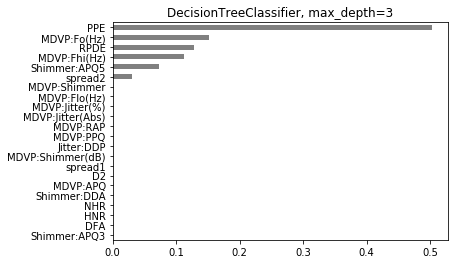

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Cross-Validation Accuracy: 0.8148245614035089 
 



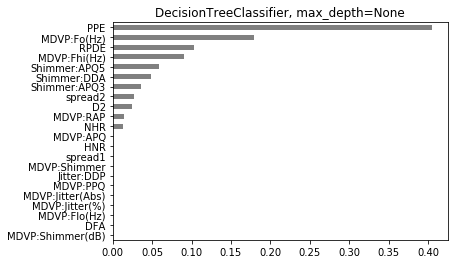

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False) 

Cross-Validation Accuracy: 0.8247953216374269 
 



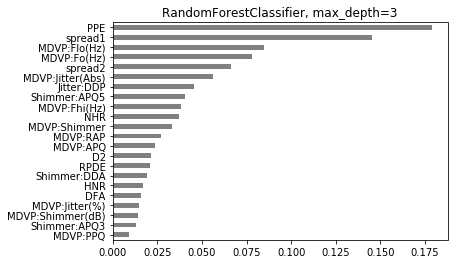

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False) 

Cross-Validation Accuracy: 0.8453508771929824 
 



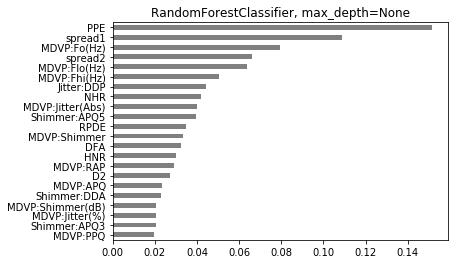

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1) 

Cross-Validation Accuracy: 0.8261695906432749 
 



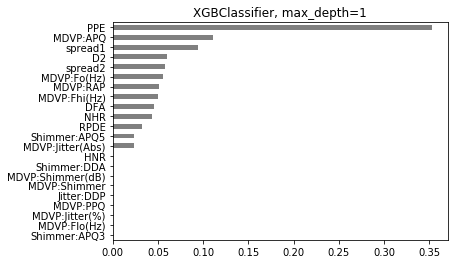

In [80]:
from sklearn.model_selection import cross_val_score

def models(X, y):
  models = [LogisticRegression(solver='lbfgs', max_iter=1000), 
          DecisionTreeClassifier(max_depth=3), 
          DecisionTreeClassifier(max_depth=None), 
          RandomForestClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42), 
          RandomForestClassifier(max_depth=None, n_estimators=100, n_jobs=-1, random_state=42), 
          XGBClassifier(max_depth=1, n_estimators=100, n_jobs=-1, random_state=42)]
  
  for model in models:    
    print(model, '\n')
    score = cross_val_score(model, X, y, scoring='accuracy', cv=10).mean()
    print('Cross-Validation Accuracy:', score, '\n', '\n')
    
    name = model.__class__.__name__
    model.fit(X, y)
    if name == 'LogisticRegression':
        coefficients = pd.Series(model.coef_[0], X.columns)
        coefficients.sort_values().plot.barh(color='grey', title=name)
        plt.show()
    else:
        importances = pd.Series(model.feature_importances_, X.columns)
        title = f'{name}, max_depth={model.max_depth}'
        importances.sort_values().plot.barh(color='grey', title=title)
        plt.show()
    
models(X, y)

In [83]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5', 'MDVP:APQ', 'NHR',
       'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [0]:
X = X.drop(columns=['Shimmer:APQ3', 'Shimmer:DDA'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 

Cross-Validation Accuracy: 0.8342397660818713 
 



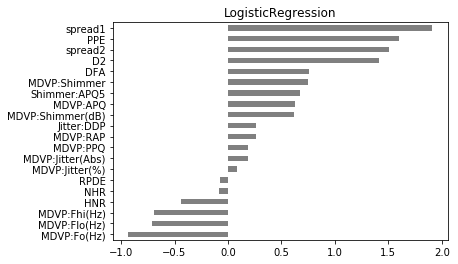

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Cross-Validation Accuracy: 0.8240058479532163 
 



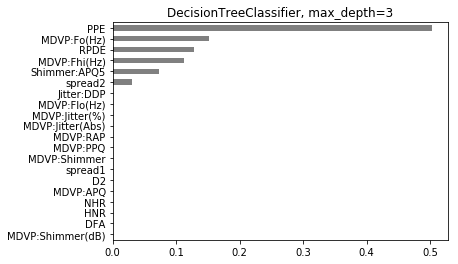

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Cross-Validation Accuracy: 0.799561403508772 
 



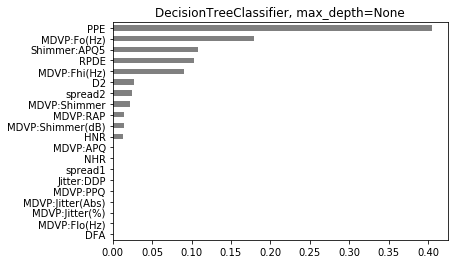

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False) 

Cross-Validation Accuracy: 0.8092397660818713 
 



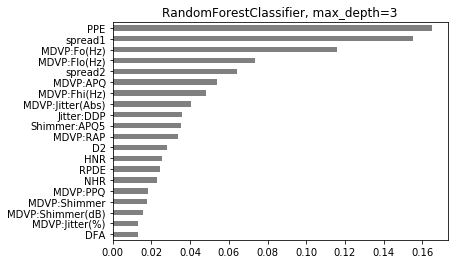

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False) 

Cross-Validation Accuracy: 0.865906432748538 
 



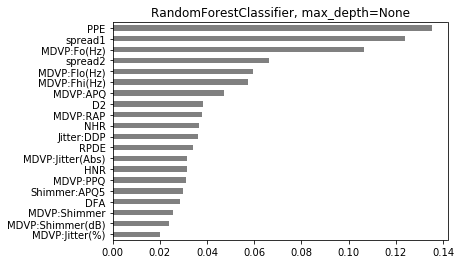

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1) 

Cross-Validation Accuracy: 0.8261695906432749 
 



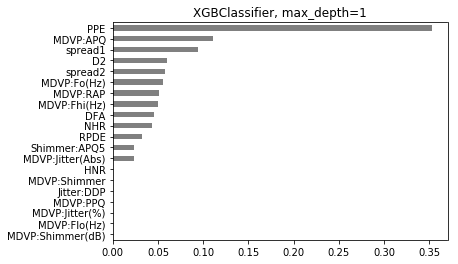

In [84]:
models(X, y)